In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|', low_memory=False)

# Display the first few rows of the DataFrame
print(data.head())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [3]:
# Check the data types of each column
print(data.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [4]:
data.shape

(1000098, 52)

<h1>Data Summarization</h1>

In [5]:
#Descriptive Statistics: Calculate the variability for numerical features
features = ['TotalPremium','TotalClaims', 'SumInsured']
data[features].describe()

,TotalPremium,TotalClaims,SumInsured
count,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,6.041727e+05
std,2.302845e+02,2.384075e+03,1.508332e+06
min,-7.825768e+02,-1.200241e+04,1.000000e-02
25%,0.000000e+00,0.000000e+00,5.000000e+03
50%,2.178333e+00,0.000000e+00,7.500000e+03
75%,2.192982e+01,0.000000e+00,2.500000e+05
max,6.528260e+04,3.930921e+05,1.263620e+07


In [6]:
#Data Structure: Review the dtype of each column
print("\nData structure:")
print(data.dtypes)


Data structure:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoo

<h1>Data Quality Assessment:</h1>

In [7]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

In [8]:
# Handle missing values
# For numerical columns, fill missing values with mean or median
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [9]:
# For categorical columns, fill missing values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [10]:
# Save cleaned data to a new file
data.to_csv('../data/cleaned_data.csv', index=False)

In [11]:
# Save cleaned data to a new file
data.to_csv('../data/cleaned_data.csv', index=False)

In [14]:
# Check for missing values after cleaning 
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoo

<h1>Univariate Analysis:</h1>

<Axes: xlabel='CoverType'>

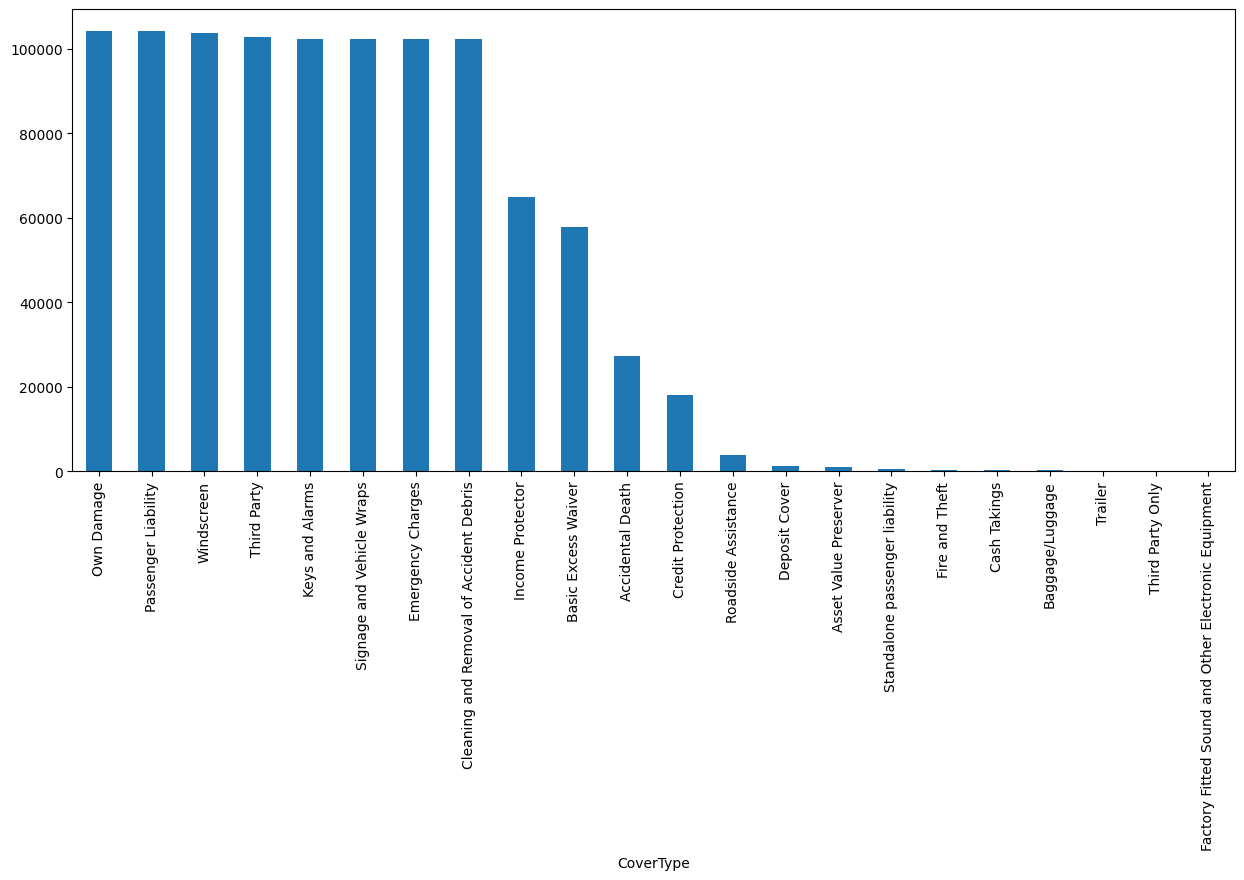

In [12]:
# catagorical analysis on cover type vs count 
data['CoverType'].value_counts().plot(kind='bar', figsize=(15,6))

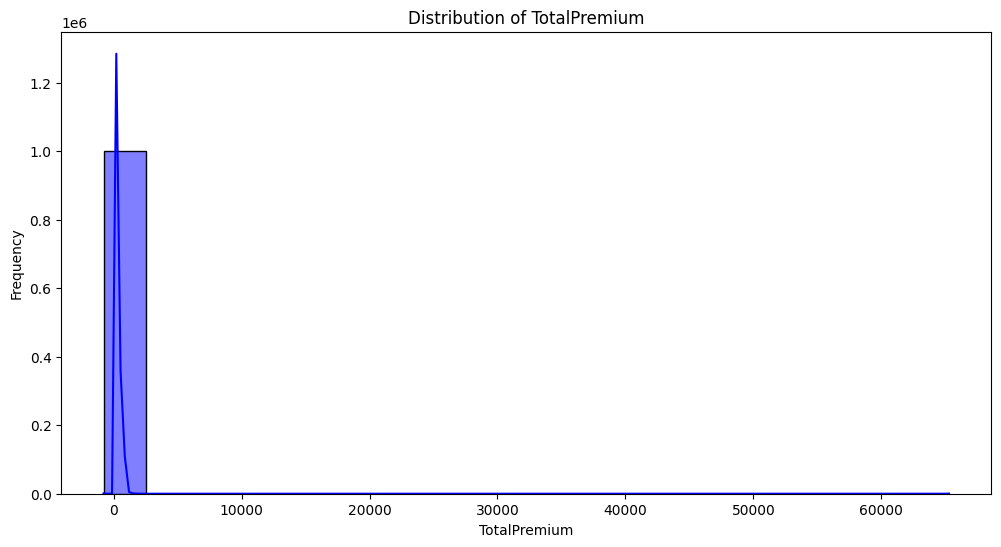

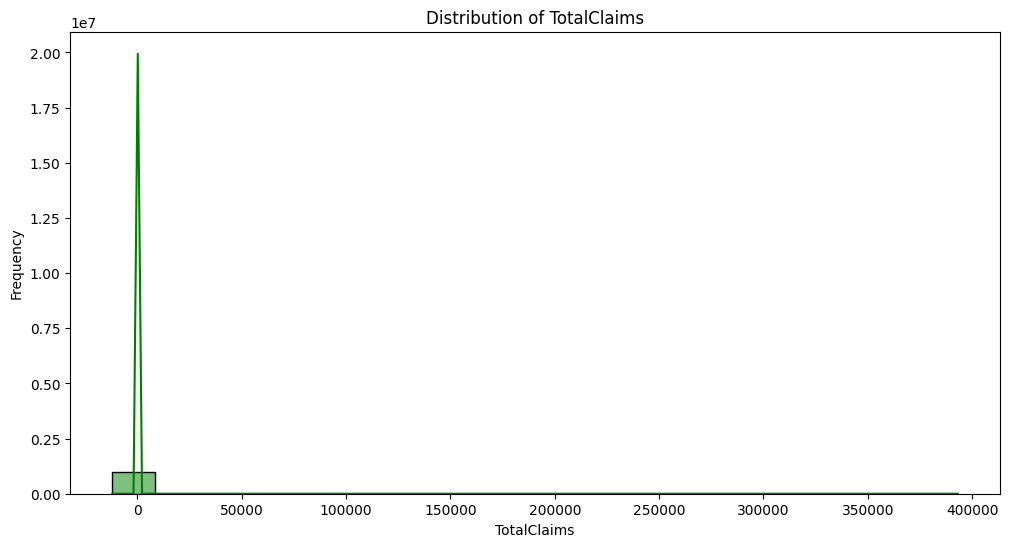

In [13]:
# Distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data['TotalPremium'], bins=20, kde=True, color='blue')
plt.title('Distribution of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['TotalClaims'], bins=20, kde=True, color='green')
plt.title('Distribution of TotalClaims')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.show()

<h1>Bivariate or Multivariate Analysis:</h1>

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


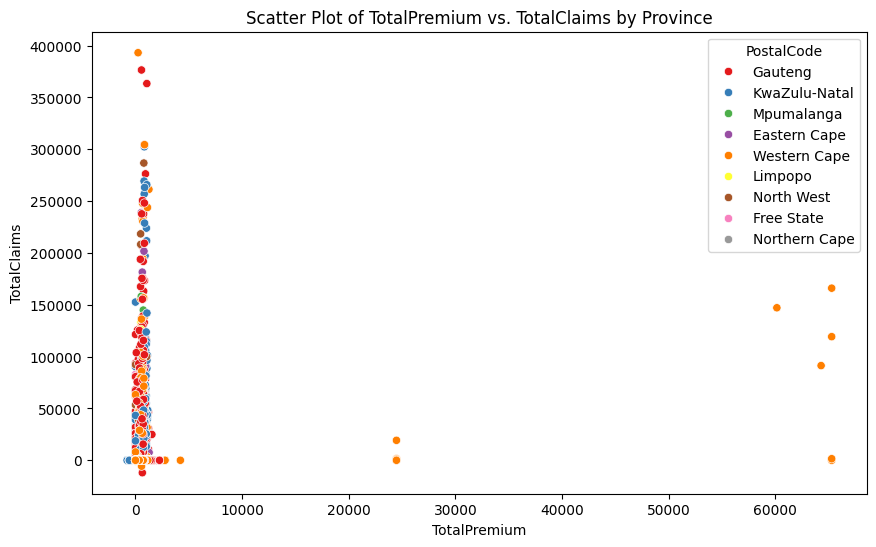

Correlation Matrix:
Province
Eastern Cape     0.059646
Free State       0.054746
Gauteng          0.092761
KwaZulu-Natal    0.101787
Limpopo          0.053468
Mpumalanga       0.073857
North West       0.069032
Northern Cape    0.074800
Western Cape     0.203678
Name: TotalPremium, dtype: float64


In [15]:
# Correlation Matrix
correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()
print(correlation_matrix)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalPremium', y='TotalClaims', hue='Province', palette='Set1')
plt.title('Scatter Plot of TotalPremium vs. TotalClaims by Province')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='PostalCode')
plt.show()

# Correlation matrix
correlation_matrix_zip = data.groupby('Province')[['TotalPremium', 'TotalClaims']].corr().unstack()['TotalClaims']['TotalPremium']

print("Correlation Matrix:")
print(correlation_matrix_zip)

<h1>Data Comparison</h1>

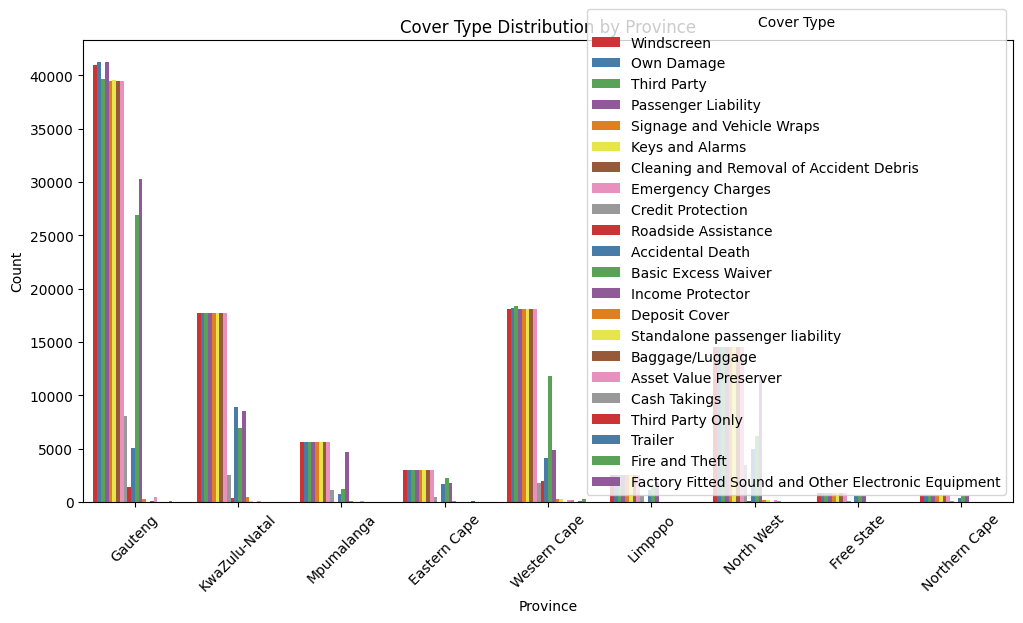

In [16]:
# Bar Plot of Cover Type by Province
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', hue='CoverType', data=data, palette='Set1')
plt.title('Cover Type Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cover Type')
plt.show()

<h1>Outlier Detection</h1>

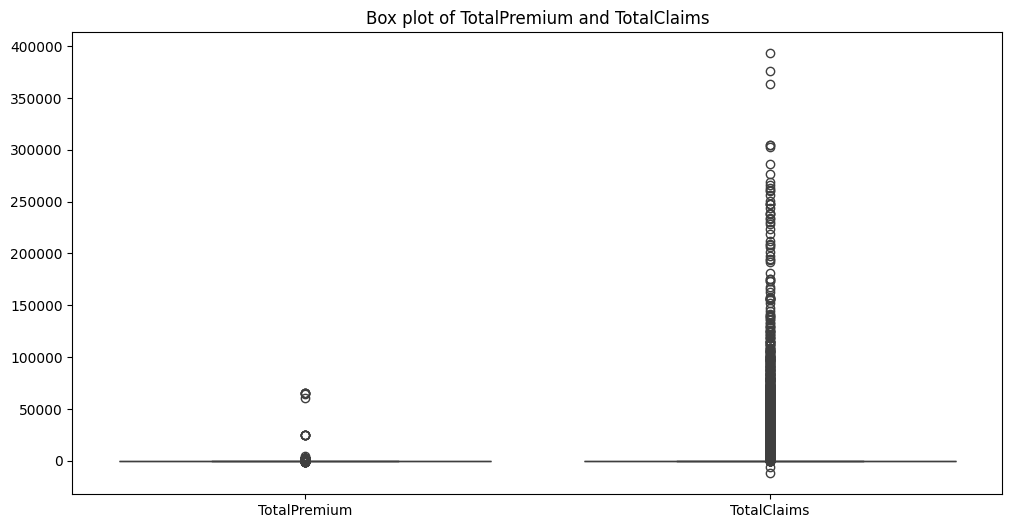

In [17]:
# Box plots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['TotalPremium', 'TotalClaims']])
plt.title('Box plot of TotalPremium and TotalClaims')
plt.show()

<h1>Visualization</h1>

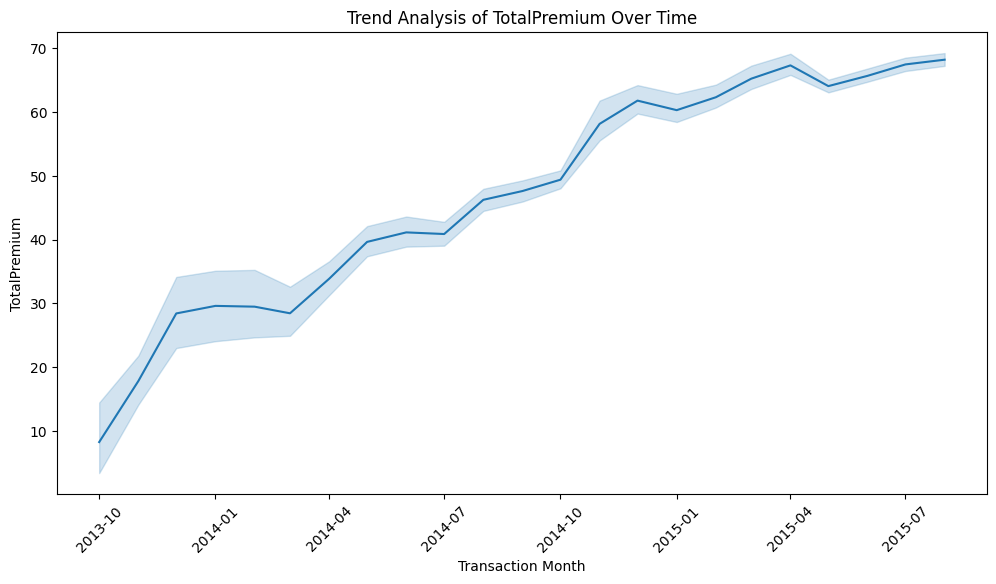

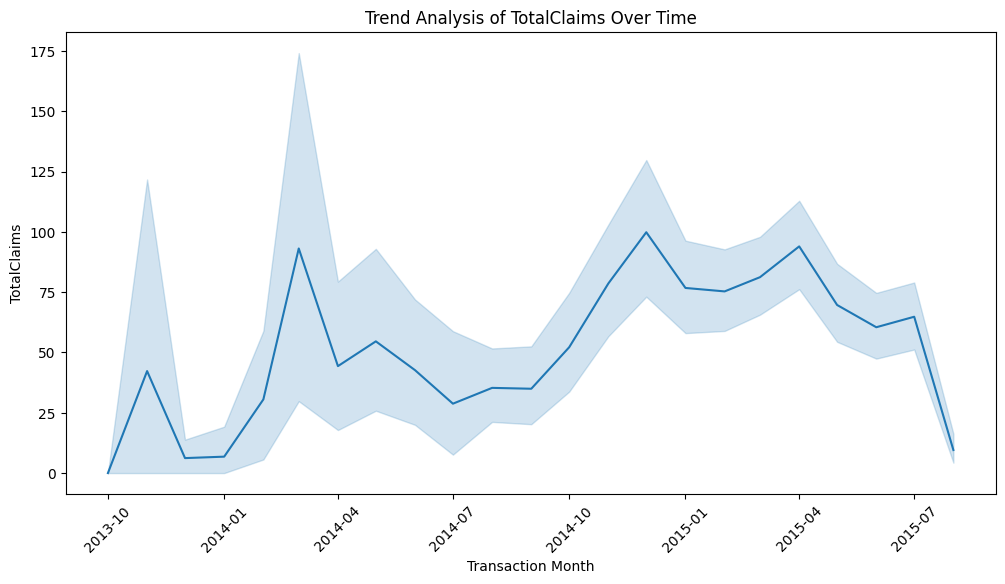

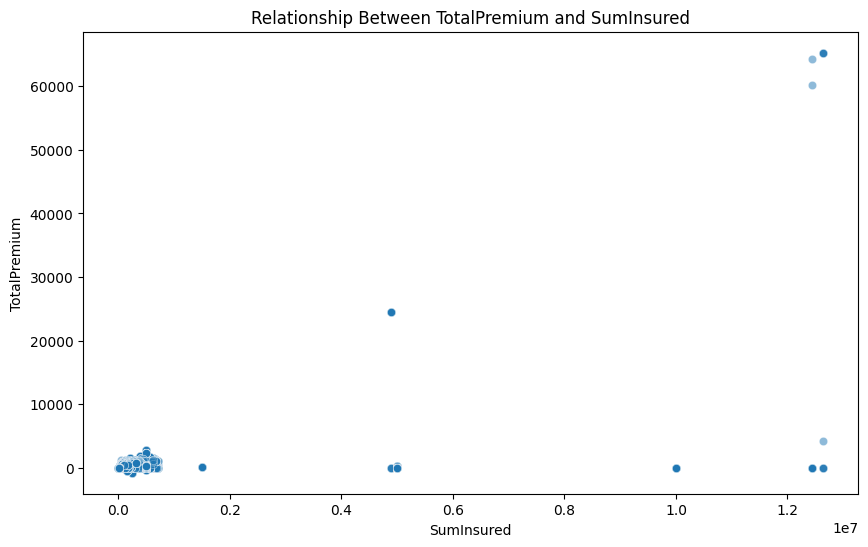

In [19]:
# Trend Analysis of TotalPremium Over Time
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalPremium', data=data)
plt.title('Trend Analysis of TotalPremium Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('TotalPremium')
plt.xticks(rotation=45)
plt.show()

# Trend Analysis of TotalPremium Over Time
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='TransactionMonth', y='TotalClaims', data=data)
plt.title('Trend Analysis of TotalClaims Over Time')
plt.xlabel('Transaction Month')
plt.ylabel('TotalClaims')
plt.xticks(rotation=45)
plt.show()

# Relationship Between TotalPremium and SumInsured
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SumInsured', y='TotalPremium', data=data, alpha=0.5)
plt.title('Relationship Between TotalPremium and SumInsured')
plt.xlabel('SumInsured')
plt.ylabel('TotalPremium')
plt.show()